In [1]:
import sys, os; 
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from src.detr.detr import build_detr
from src.data.dataset import CPPE5Dataset, collate_fn
from src.losses.loss import DETRLoss
from src.data import transforms as T
from src.data.utils import visualize_output
from experiment.detr_config import DETRCPPEConfigSanityCheck
from experiment.detr_cppe5_experiment import DETRCPPE5Experiment
from runner.detr_runner import DETRRunner

from torch.utils.data import DataLoader
from PIL import Image

import torch
import numpy as np
import random
import json
import matplotlib.pyplot as plt

/home/leo/miniconda3/envs/cvrunner/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/leo/miniconda3/envs/cvrunner/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened bec

In [3]:
## Initialize experiment and runner
experiment = DETRCPPE5Experiment()
runner = DETRRunner(experiment)

[2025-10-12 12:48:15] [INFO] START INITIALIZING TRAIN RUNNER
[2025-10-12 12:48:15] [INFO] Using device: cuda
[2025-10-12 12:48:15] [INFO] Building model
[2025-10-12 12:48:15] [INFO] Done building model
[2025-10-12 12:48:15] [INFO] Building loss function
[2025-10-12 12:48:15] [INFO] Done building loss function
[2025-10-12 12:48:15] [INFO] Building dataloaders
[2025-10-12 12:48:15] [INFO] Building train CPPE-5 dataset...
[2025-10-12 12:48:24] [INFO] train dataset size: 100
[2025-10-12 12:48:24] [INFO] Building val CPPE-5 dataset...
[2025-10-12 12:48:31] [INFO] val dataset size: 100
[2025-10-12 12:48:31] [INFO] Done building dataloaders
[2025-10-12 12:48:31] [INFO] Building optimizer and learning rate scheduler
[2025-10-12 12:48:31] [INFO] Done building optimizer and learning rate scheduler
[2025-10-12 12:48:31] [INFO] DONE INITIALIZING TRAIN RUNNER
[2025-10-12 12:48:31] [INFO] Model config: DETRCPPEConfigSanityCheck(d_model=128, nhead=4, num_encoder_layers=3, num_decoder_layers=3, dim_fe

In [20]:
dataloader = iter(runner.val_dataloader)

In [27]:
## Load val data batch

val_data_batch = next(dataloader)

In [28]:
images_dict = visualize_output(
    val_data_batch['images'],
    masks=val_data_batch['masks'],
    image_ids=val_data_batch['targets']['image_id'],
    out_labs=[torch.Tensor([]), torch.Tensor([])],
    out_bboxes=[torch.Tensor([]), torch.Tensor([])],
    gt_labs=val_data_batch['targets']['labels'],
    gt_bboxes=val_data_batch['targets']['boxes'],
    unormalize=True
)

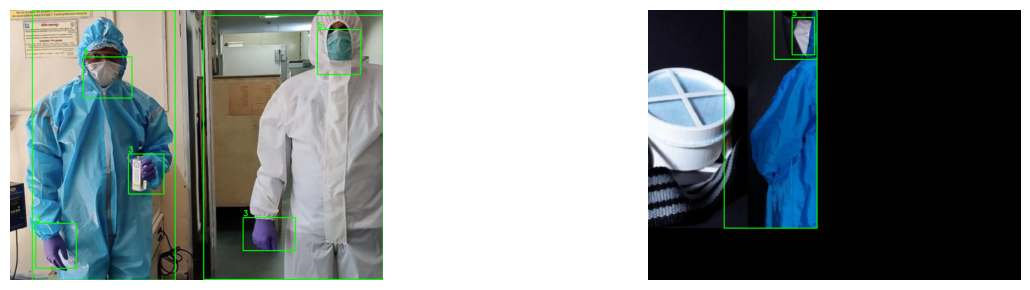

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

for ax, img in zip(axes, list(images_dict.values())):
    ax.imshow(img)
    ax.axis('off')  # hide axes for a clean look

plt.tight_layout()
plt.show()